In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import scipy.stats as stats
%matplotlib inline

# Data preprocessing

In [16]:
data=pd.read_csv('zomato.csv')

In [17]:
data.shape

(51717, 17)

In [3]:
data.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
#dropping unneccesary columns 
data.drop(['url', 'address', 'phone','name','listed_in(city)','cuisines','dish_liked','reviews_list','menu_item'], axis=1, inplace = True)

In [7]:
#renaming some columns
data.rename(columns = {"approx_cost(for two people)" : "cost_two", "listed_in(type)" : "service_type"}, inplace = True)

<ul> <li>Converting cost_two to float and slicing rate column.
<li>Since cost_two has comma, we can't directly convert it to float

In [8]:
data['cost_two']=data['cost_two'].astype(str)
data['cost_two']=data['cost_two'].apply(lambda x:x.replace(',','')).astype(float)

In [9]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
data['rate']=data['rate'].replace('NEW',np.NaN)
data['rate']=data['rate'].replace('-',np.NaN)
data['rate']=data['rate'].astype(str)

In [11]:
data['rate']=data['rate'].apply(lambda x:x.replace('/5','')).astype(float)

# Missing values

<AxesSubplot:>

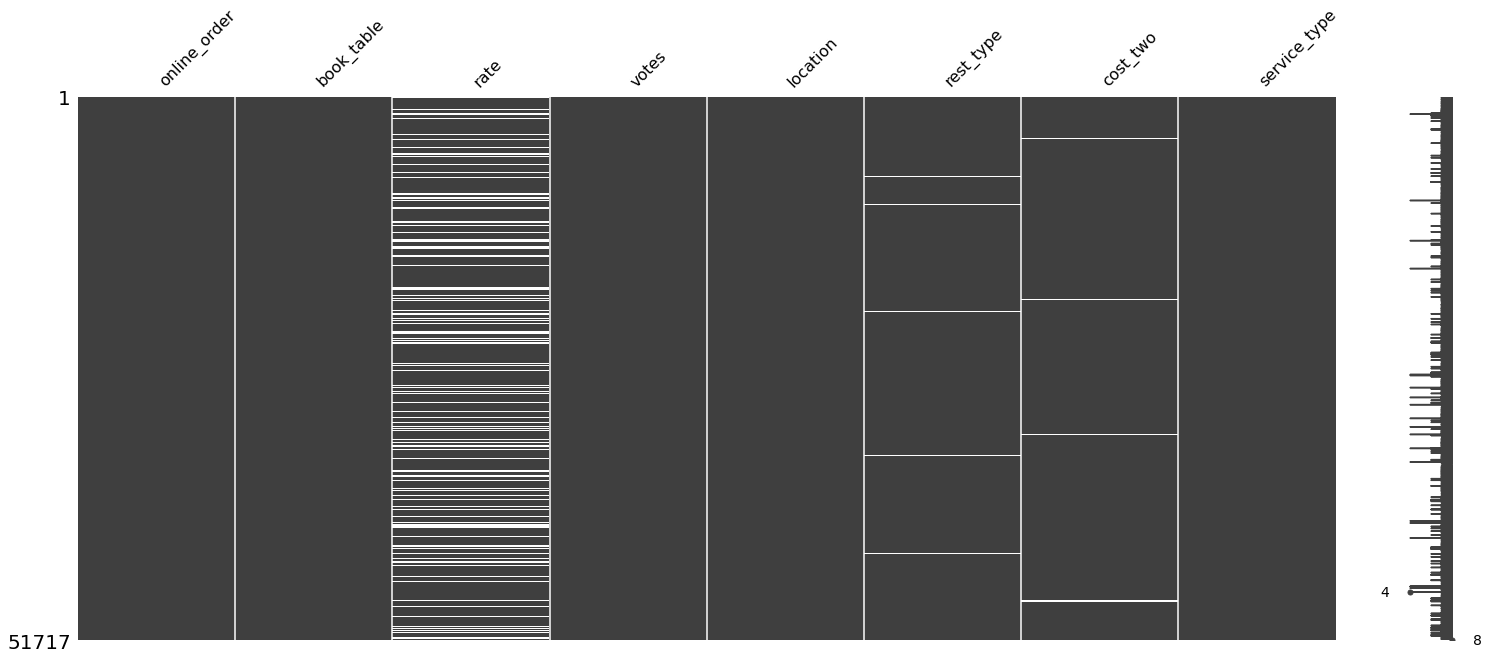

In [12]:
msno.matrix(data)

In [13]:
data.isna().sum()

online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cost_two          346
service_type        0
dtype: int64

<ul> <li>Clearly, dish_liked column has almost half values missing . We will drop it because anyways we won't use it in our prediction.</li>
    <li> Drop missing values from rest_type </li>
    <li>Replacing missing values of rate with mean.</li>

In [14]:
data['rate'] = data['rate'].fillna(data['rate'].mean())
data['cost_two'] = data['cost_two'].fillna(data['cost_two'].mean())

In [15]:
data.dropna(how='any',inplace=True)

In [18]:
x = data.drop(['rate'], axis = 1)
y = data['rate']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.20)

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline 
from sklearn.preprocessing import MinMaxScaler

In [21]:
X_train

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
42518,https://www.zomato.com/bangalore/ente-keralam-...,"12/1, Ulsoor Road, Sivanchetti Gardens, Ulsoor...",Ente Keralam,Yes,No,1104,+91 7846830749\n080 41133707,Ulsoor,Casual Dining,"Appam, Fish, Mutton Stew, Cocktails, Egg Roast...","Kerala, Seafood","1,300","[('Rated 3.0', 'RATED\n Quality of this place...",[],Delivery,MG Road
17362,https://www.zomato.com/bangalore/sms-stop-maki...,"16, 5th Floor, 9th Wing, 17th Cross, HSR Layou...",SMS: Stop Making Sense,No,No,0,+91 9036488890,HSR,Quick Bites,NaN,"Chinese, Continental, North Indian",400,[],[],Dine-out,HSR
10860,https://www.zomato.com/bangalore/truffles-kora...,"28, 4th 'B' Cross, Koramangala 5th Block, Bang...",Truffles,No,No,14654,080 41466565\r\r\n080 41536565,Koramangala 5th Block,"Cafe, Casual Dining","Burgers, Pasta, Cocktails, American Cheese Bur...","Cafe, American, Burger, Steak",900,"[('Rated 5.0', 'RATED\n Menu is extensive and...",[],Dine-out,BTM
26871,https://www.zomato.com/bangalore/dwaraka-krish...,"16th Main Road, 1st Stage, 1st Phase, BTM, Ban...",Dwaraka Krishna,Yes,No,328,+91 9538833223\r\r\n+91 9742044034,BTM,"Takeaway, Delivery","Biryani, Shahi Paneer","North Indian, Biryani, Chinese",500,"[('Rated 3.0', 'RATED\n Just ordered shahi pa...","['Veg Regular Biryani', 'Paneer Regular Biryan...",Delivery,Koramangala 4th Block
18480,https://www.zomato.com/bangalore/cks-bakery-ci...,"Ground Floor, Favourite Plaza, Showroom 15/8-1...",CK's Bakery,Yes,No,0,+91 7397497134\r\n+91 9663104177,City Market,Bakery,NaN,"Bakery, Fast Food",200,"[('Rated 5.0', 'RATED\n DonÃ\x83Ã\x83Ã\x82...",[],Delivery,Indiranagar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,https://www.zomato.com/bangalore/kitchens@whit...,"710, Thubarahalli, Varthur Main Road, Whitefie...",Kitchens@Whitefield,Yes,No,215,080 43334333,"Varthur Main Road, Whitefield","Takeaway, Delivery",NaN,"Biryani, Kerala, Mughlai, Street Food, North I...",400,"[('Rated 3.0', ""RATED\n Ordered several times...","['Easy Veg Meal', 'Easy Chicken Meal', 'Easy F...",Delivery,Brookefield
11114,https://www.zomato.com/bangalore/parisar-veg-r...,"52/53 Kavery Nagar, Kodichikkanahalli Main Roa...",Parisar Veg Restaurant,Yes,No,64,080 49589900\r\r\n+91 8123083228,Bommanahalli,Casual Dining,"Masala Dosa, Vada","Chinese, North Indian, South Indian",400,"[('Rated 1.0', ""RATED\n It was the worst inte...",[],Dine-out,BTM
753,https://www.zomato.com/bangalore/sri-raghavend...,"166, Banashankari, Bangalore",Sri Raghavendra Prasanna Coffee Beans Club,No,No,0,080 26718077,Banashankari,Quick Bites,NaN,South Indian,150,[],[],Dine-out,Banashankari
37710,https://www.zomato.com/bangalore/monarch-briga...,"54, The Monarch Hotels, Brigade Road, Bangalore",Monarch,No,No,10,080 42507000,Brigade Road,Casual Dining,NaN,"North Indian, Chinese, Continental, South Indian",700,"[('Rated 4.0', 'RATED\n A very centrally loca...",[],Buffet,Lavelle Road


In [22]:
#one hot encoding columns 
trf1=ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,3,4,6])
],remainder='passthrough')